In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.rc('font',**{'size':20})

from cmip import model_list

from scipy import stats
import yaml

In [2]:
with open('data/DGPI.yaml', 'r') as f:
    dgpi = yaml.safe_load(f)
    
with open('data/SPI.yaml', 'r') as f:
    spi = yaml.safe_load(f)
    
with open('data/Cloud_feedback.yaml', 'r') as f:
    cf = yaml.safe_load(f)
    
with open('data/ECS.yaml', 'r') as f:
    ecs = yaml.safe_load(f)

In [3]:
models = model_list()

basin = 'NH Tropics'
ddgpi = np.array([(dgpi[basin][m]['abrupt-4xCO2'] - dgpi[basin][m]['piControl'])/dgpi[basin][m]['piControl']*100/ecs[m]['dT'] for m in models])
ddgpi_abs = np.array([(dgpi[basin][m]['abrupt-4xCO2'] - dgpi[basin][m]['piControl'])/dgpi[basin][m]['piControl']*100 for m in models])
dspi = np.array([(spi[basin][m]['abrupt-4xCO2'] - spi[basin][m]['piControl'])/spi[basin][m]['piControl']*100/ecs[m]['dT'] for m in models])
dspi_abs = np.array([(spi[basin][m]['abrupt-4xCO2'] - spi[basin][m]['piControl'])/spi[basin][m]['piControl']*100 for m in models])
sw = np.array([cf[basin][m]['lambda_c_sw'] for m in models])
lw = np.array([cf[basin][m]['lambda_c_lw'] for m in models])

ecs_global = np.array([ecs[m]['ECS'] for m in models])

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_836746/428789318.py:7: SyntaxWarning: invalid escape sequence '\d'
  ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'],
/tmp/ipykernel_836746/428789318.py:7: SyntaxWarning: invalid escape sequence '\d'
  ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'],


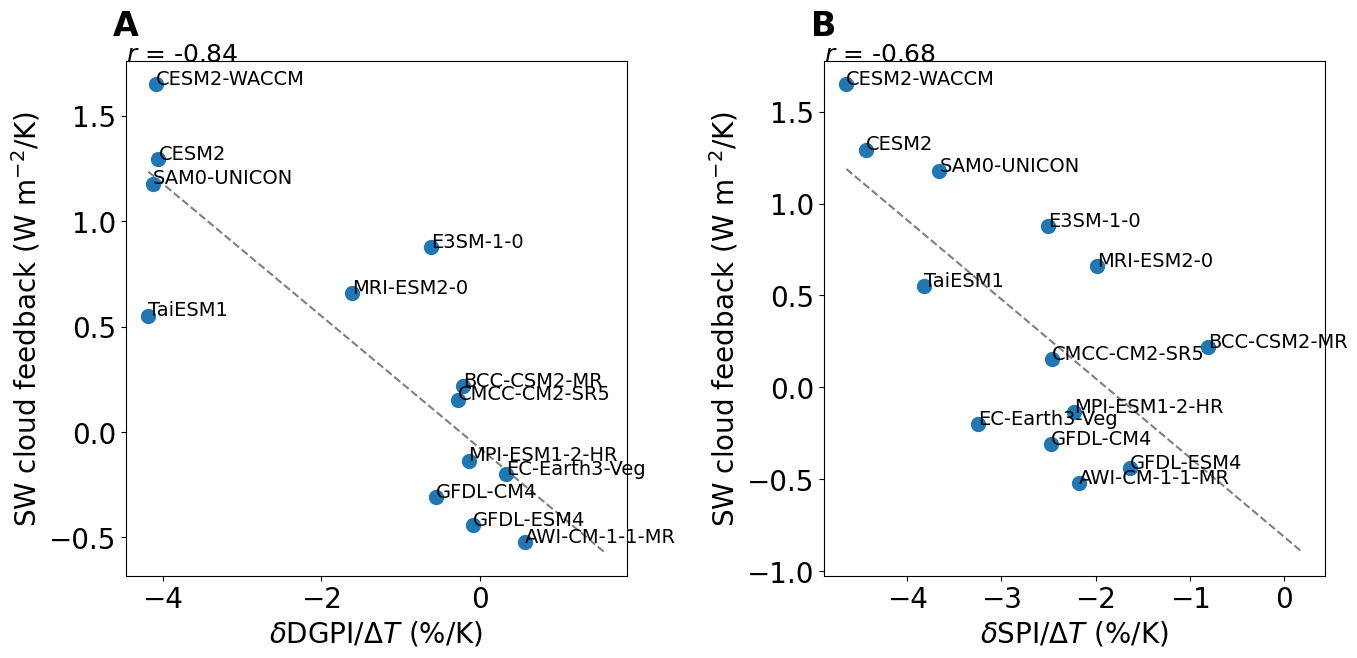

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor='w')

for ax, xx, yy, xlabel, ylabel in \
    zip(axes, 
        [ddgpi, dspi], 
        [sw, sw], 
        ['$\delta$DGPI/$\Delta T$ (%/K)', '$\delta$SPI/$\Delta T$ (%/K)'], 
        ['SW cloud feedback (W m$^{-2}$/K)', 'SW cloud feedback (W m$^{-2}$/K)']):
    plt.sca(ax)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(xx, yy)
    xx_tmp = np.linspace(np.nanmin(xx), np.nanmax(xx)+1)
    plt.plot(xx_tmp, intercept + slope*xx_tmp, 'gray', ls='--')
    plt.text(0, 1.0, '$r$ = %.2f'%(r_value), transform=ax.transAxes, fontsize=18)

    plt.plot(xx, yy, 'o', markersize=10)

    for i in range(len(models)):
        plt.gca().annotate(models[i], (xx[i], yy[i]), fontsize=14)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

for i in range(len(axes)):
    plt.sca(axes[i])
    plt.text(0, 1.05, f'{chr(ord("A")+i)}', transform=plt.gca().transAxes, weight='bold', fontsize=24, horizontalalignment='center')

plt.tight_layout()

# plt.savefig('Fig1.pdf', bbox_inches='tight')

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_836746/2427348428.py:7: SyntaxWarning: invalid escape sequence '\d'
  ['SW cloud feedback (W m$^{-2}$/K)', '$\delta$SPI/$\Delta T$ (%/K)', '$\delta$SPI (%)'],
/tmp/ipykernel_836746/2427348428.py:7: SyntaxWarning: invalid escape sequence '\d'
  ['SW cloud feedback (W m$^{-2}$/K)', '$\delta$SPI/$\Delta T$ (%/K)', '$\delta$SPI (%)'],


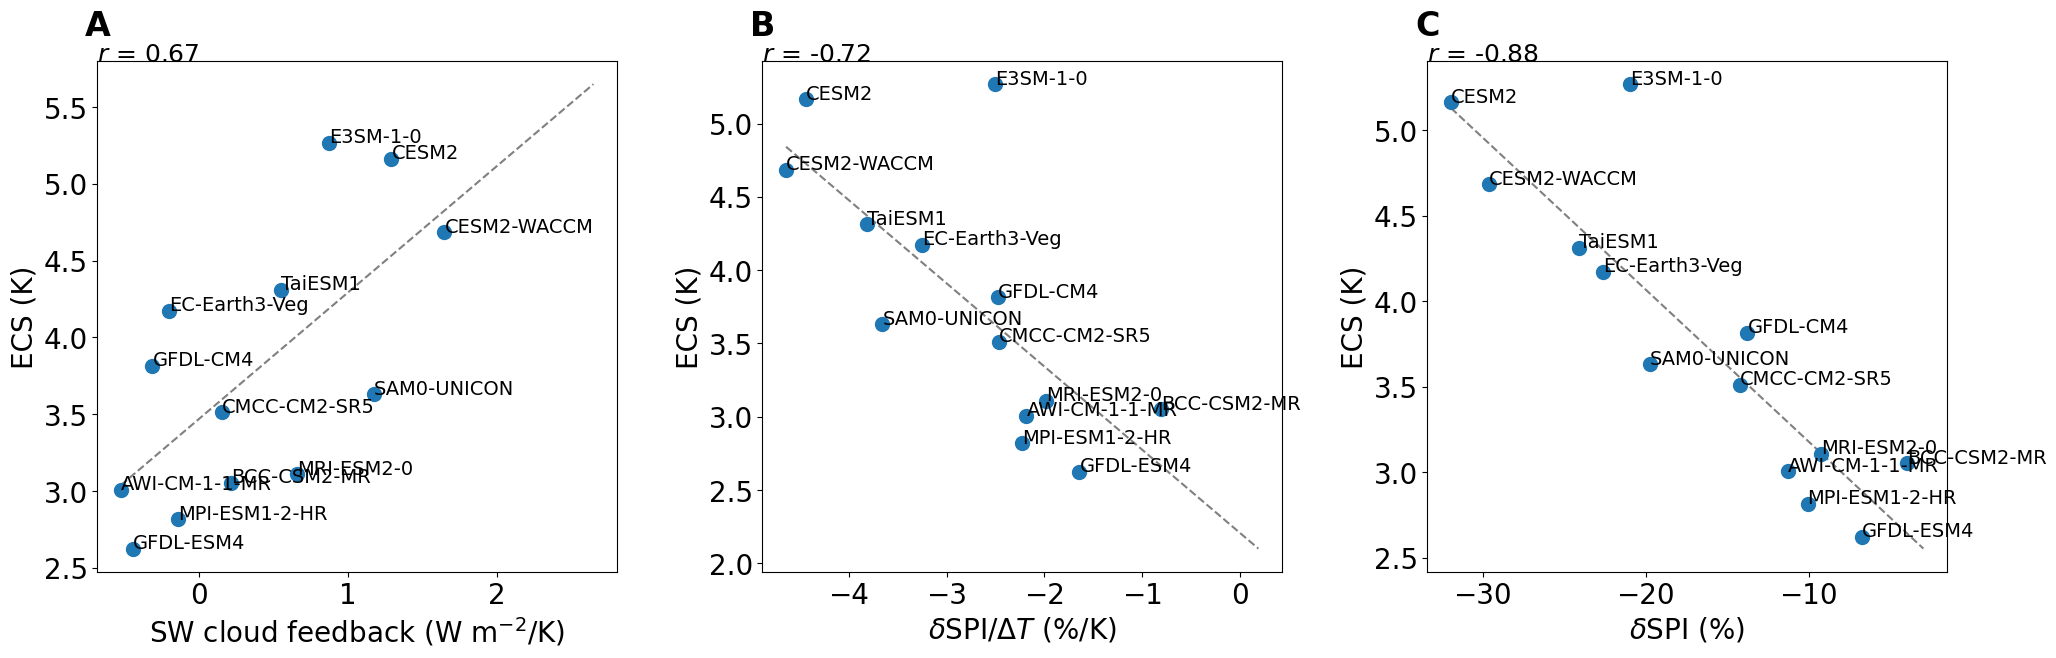

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7), facecolor='w')

for ax, xx, yy, xlabel, ylabel in \
    zip(axes, 
        [sw, dspi, dspi_abs], 
        [ecs_global, ecs_global, ecs_global], 
        ['SW cloud feedback (W m$^{-2}$/K)', '$\delta$SPI/$\Delta T$ (%/K)', '$\delta$SPI (%)'], 
        ['ECS (K)', 'ECS (K)', 'ECS (K)']):
    plt.sca(ax)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(xx, yy)
    xx_tmp = np.linspace(np.nanmin(xx), np.nanmax(xx)+1)
    plt.plot(xx_tmp, intercept + slope*xx_tmp, 'gray', ls='--')
    plt.text(0, 1.0, '$r$ = %.2f'%(r_value), transform=ax.transAxes, fontsize=18)

    plt.plot(xx, yy, 'o', markersize=10)

    for i in range(len(models)):
        plt.gca().annotate(models[i], (xx[i], yy[i]), fontsize=14)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
for i in range(len(axes)):
    plt.sca(axes[i])
    plt.text(0, 1.05, f'{chr(ord("A")+i)}', transform=plt.gca().transAxes, weight='bold', fontsize=24, horizontalalignment='center')

plt.tight_layout()

# plt.savefig('Fig5.pdf', bbox_inches='tight')